In [26]:
import zipfile
import os

# 압축 파일 경로 (업로드한 파일 경로로 수정)
zip_path = "/data/BUS/yolobusnumber.v10i.yolov8.zip"

# 압축 해제 폴더 지정
extract_path = "/data/BUS/"

# 폴더가 없으면 생성
os.makedirs(extract_path, exist_ok=True)

# ZIP 파일 압축 해제
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"✅ 압축 해제 완료! 데이터 경로: {extract_path}")


✅ 압축 해제 완료! 데이터 경로: /data/BUS/


/tmp/ipykernel_47940/11206125.py:56: UserWarning: Glyph 49707 (\N{HANGUL SYLLABLE SUS}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_47940/11206125.py:56: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49707 (\N{HANGUL SYLLABLE SUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


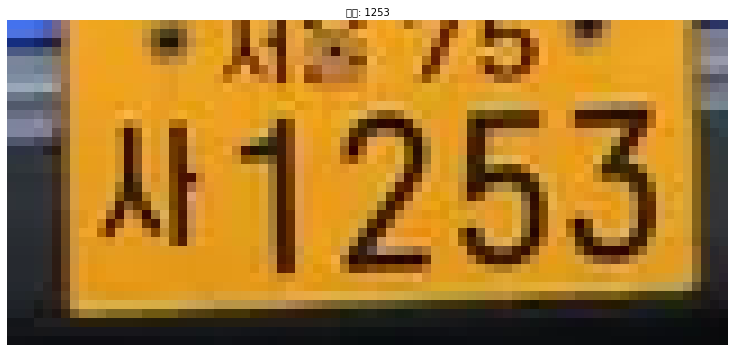

In [1]:
import easyocr
import cv2
import re
import matplotlib.pyplot as plt
import numpy as np

# EasyOCR 리더 생성 (한국어 포함)
reader = easyocr.Reader(["ko", "en"])  # 한국어 + 영어 지원

# OCR 수행할 이미지 로드
image_path = "/data/BUS/image_4.png"
image = cv2.imread(image_path)

# OCR 실행
results = reader.readtext(image)

# 숫자만 인식한 영역을 크롭하여 시각화
cropped_images = []

for bbox, text, prob in results:
    numbers = re.findall(r'\d+', text)  # 숫자만 추출
    if numbers and prob > 0.9:  # 신뢰도 50% 이상만 처리
        extracted_number = " ".join(numbers)

        # OCR Bounding Box 좌표 (좌표 보정)
        (top_left, top_right, bottom_right, bottom_left) = bbox
        x_min = int(min(top_left[0], bottom_left[0])) - 5
        x_max = int(max(top_right[0], bottom_right[0])) + 5
        y_min = int(min(top_left[1], top_right[1])) - 5
        y_max = int(max(bottom_left[1], bottom_right[1])) + 5

        # 이미지 경계 넘어가는지 확인
        x_min = max(x_min, 0)
        y_min = max(y_min, 0)
        x_max = min(x_max, image.shape[1])
        y_max = min(y_max, image.shape[0])

        # 숫자가 있는 부분 크롭
        cropped_img = image[y_min:y_max, x_min:x_max]
        cropped_images.append((cropped_img, extracted_number))

# 🔹 Matplotlib에서 자동 크기 조정 (이미지가 1개인지 확인)
num_images = len(cropped_images)
fig, axs = plt.subplots(1, num_images, figsize=(15, 5))

# 🔹 `axs`가 리스트가 아니라면 리스트처럼 처리
if num_images == 1:
    axs = np.array([axs])  # 단일 객체를 배열로 변환

# 🔹 이미지 표시
for idx, (cropped_img, extracted_number) in enumerate(cropped_images):
    axs[idx].imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
    axs[idx].set_title(f"숫자: {extracted_number}", fontsize=10)
    axs[idx].axis("off")

plt.tight_layout()
plt.show()



0: 416x640 1 bus, 1 front_num, 30.7ms
Speed: 2.5ms preprocess, 30.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)


/tmp/ipykernel_47433/603011482.py:49: UserWarning: Glyph 53668 (\N{HANGUL SYLLABLE TON}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_47433/603011482.py:49: UserWarning: Glyph 46028 (\N{HANGUL SYLLABLE DOL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_47433/603011482.py:49: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_47433/603011482.py:49: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53668 (\N{HANGUL SYLLABLE TON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46028 (\N{HANGUL SYLLABLE DOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: 

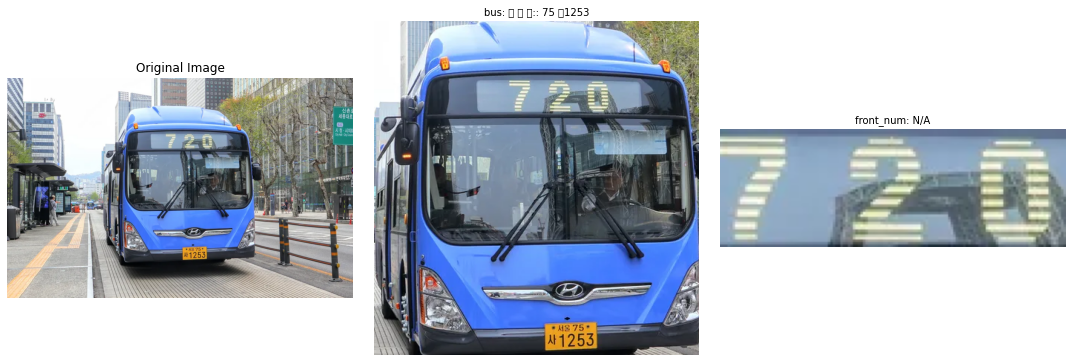

🚏 **인식된 버스 번호 정보**
bus: 톤 돌 서:: 75 사1253
front_num: N/A


In [1]:
import cv2
import easyocr
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# **1️⃣ YOLO 모델 로드**
model = YOLO("/data/BUS/trained_model.pt")  # 🔹 YOLO 모델 파일 경로 설정 (사용자 데이터셋 기반)

# **2️⃣ 이미지 로드**
image_path = "/data/BUS/image_4.png"
image = cv2.imread(image_path)

# **3️⃣ YOLO로 객체 탐지**
results = model(image)

# EasyOCR 리더 생성
reader = easyocr.Reader(["ko", "en"])

# **4️⃣ 탐지된 객체 정보 정리**
cropped_images = {}
for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # 검출된 박스 좌표
        label = r.names[int(box.cls[0])]  # 객체 이름 (예: 'front_num', 'side_num')

        # 🔹 검출된 번호판 영역 크롭
        cropped_img = image[y1:y2, x1:x2]
        cropped_images[label] = cropped_img  # 라벨별 이미지 저장

# **5️⃣ OCR 실행 & 결과 저장**
ocr_results = {}
for label, cropped_img in cropped_images.items():
    ocr_result = reader.readtext(cropped_img, detail=0)  # EasyOCR 실행
    extracted_text = " ".join(ocr_result) if ocr_result else "N/A"
    ocr_results[label] = extracted_text

# **6️⃣ 결과 시각화**
fig, axs = plt.subplots(1, len(cropped_images) + 1, figsize=(15, 5))
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title("Original Image")
axs[0].axis("off")

for idx, (label, cropped_img) in enumerate(cropped_images.items()):
    axs[idx + 1].imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
    axs[idx + 1].set_title(f"{label}: {ocr_results[label]}", fontsize=10)
    axs[idx + 1].axis("off")

plt.tight_layout()
plt.show()

# **7️⃣ 최종 OCR 결과 출력**
print("🚏 **인식된 버스 번호 정보**")
for label, text in ocr_results.items():
    print(f"{label}: {text}")



0: 416x640 2 buss, 1 front_num, 31.5ms
Speed: 2.5ms preprocess, 31.5ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)


/tmp/ipykernel_47940/747320137.py:74: UserWarning: Glyph 53952 (\N{HANGUL SYLLABLE TEUL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_47940/747320137.py:74: UserWarning: Glyph 51460 (\N{HANGUL SYLLABLE JUL}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53952 (\N{HANGUL SYLLABLE TEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51460 (\N{HANGUL SYLLABLE JUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


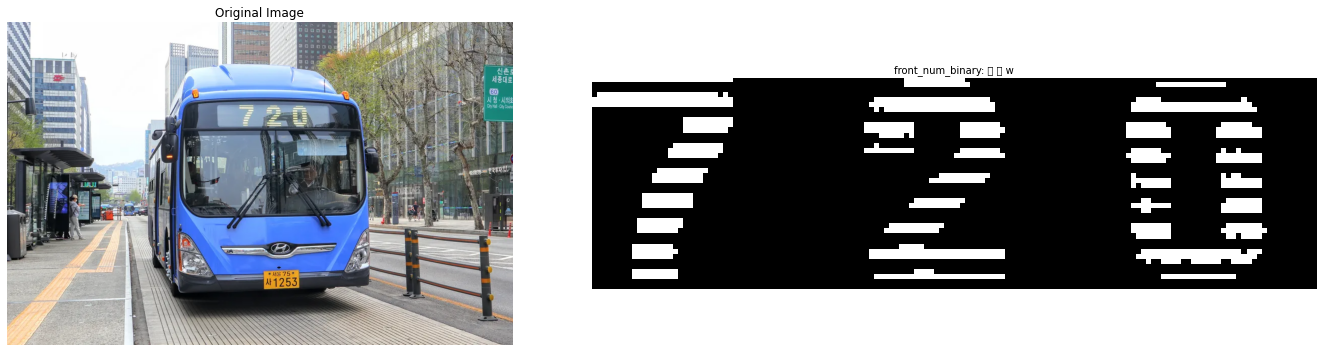

{'front_num_binary': '틀 줄 w'}

In [2]:
# **📌 YOLO를 활용하여 front_num 영역만 검출 후 배경을 제거한 바이너리 이미지로 변환 & OCR 실행**

import cv2
import easyocr
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# **1️⃣ YOLO 모델 로드**
model_path = "/data/BUS/runs/detect/train2/weights/best.pt"  # YOLO 모델 파일 경로
model = YOLO(model_path)

# **2️⃣ 이미지 로드**
image_path = "/data/BUS/image_4.png"  # 업로드된 이미지 사용
image = cv2.imread(image_path)

# **3️⃣ YOLO를 사용하여 front_num 부분 탐지**
results = model(image)

# EasyOCR 리더 생성
reader = easyocr.Reader(["ko", "en"])

# **4️⃣ front_num 영역 크롭**
cropped_images = {}
for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # 검출된 박스 좌표
        label = r.names[int(box.cls[0])]  # 객체 이름

        if label == "front_num":  # 🔹 'front_num' 태그가 붙은 영역만 사용
            cropped_img = image[y1:y2, x1:x2]
            cropped_images[label] = cropped_img  # 라벨별 이미지 저장

# **5️⃣ 바이너리 변환 (배경 제거 & 숫자 강조) 및 OCR 실행**
ocr_results = {}
processed_images = {}

for label, cropped_img in cropped_images.items():
    # 🔹 그레이스케일 변환
    gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

    # 🔹 흰색(LED 숫자) 검출
    lower_white = 200  # 밝은 영역 기준
    upper_white = 255
    _, binary = cv2.threshold(gray, lower_white, upper_white, cv2.THRESH_BINARY)

    # 🔹 바이너리 이미지 저장
    processed_images[f"{label}_binary"] = binary

    # 🔹 OCR 실행
    ocr_result = reader.readtext(binary, detail=0)  # EasyOCR 실행
    extracted_text = " ".join(ocr_result) if ocr_result else "N/A"
    ocr_results[f"{label}_binary"] = extracted_text

# **6️⃣ 결과 시각화**
num_images = len(processed_images) + 1  # 원본 이미지 포함
fig, axs = plt.subplots(1, num_images, figsize=(20, 5))

# 🔹 `axs`가 단일 객체인지 확인 후 처리
if num_images == 1:
    axs.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs.set_title("Original Image")
    axs.axis("off")
else:
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[0].set_title("Original Image")
    axs[0].axis("off")

    for idx, (label, processed_img) in enumerate(processed_images.items()):
        axs[idx + 1].imshow(processed_img, cmap="gray")
        axs[idx + 1].set_title(f"{label}: {ocr_results[label]}", fontsize=10)
        axs[idx + 1].axis("off")

plt.tight_layout()
plt.show()

# **7️⃣ 최종 OCR 결과 출력**
ocr_results



0: 416x640 2 buss, 1 front_num, 6.2ms
Speed: 1.5ms preprocess, 6.2ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)


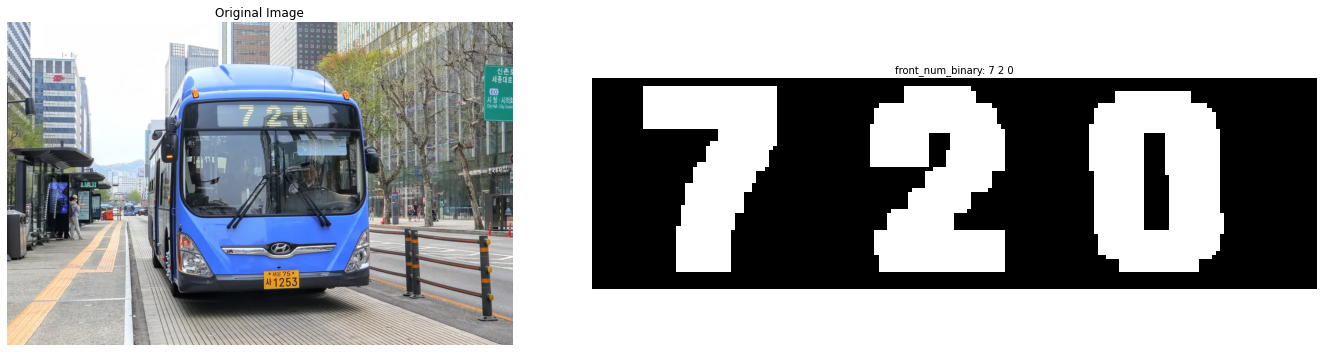

{'front_num_binary': '7 2 0'}

In [3]:
# **📌 YOLO를 활용하여 front_num 영역만 검출 후 바운딩 박스 확장 및 OCR 실행**

import cv2
import easyocr
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# **1️⃣ YOLO 모델 로드**
model_path = "/data/BUS/runs/detect/train2/weights/best.pt"  # YOLO 모델 파일 경로
model = YOLO(model_path)

# **2️⃣ 이미지 로드**
image_path = "/data/BUS/image_4.png"  # 업로드된 이미지 사용
image = cv2.imread(image_path)

# **3️⃣ YOLO를 사용하여 front_num 부분 탐지**
results = model(image)

# EasyOCR 리더 생성
reader = easyocr.Reader(["ko", "en"])

# **4️⃣ front_num 영역 크롭 (바운딩 박스 확장)**
cropped_images = {}
expand_ratio = 0.1  # 🔹 바운딩 박스를 확장할 비율 (10%)

for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # 검출된 박스 좌표
        label = r.names[int(box.cls[0])]  # 객체 이름

        if label == "front_num":  # 🔹 'front_num' 태그가 붙은 영역만 사용
            # 🔹 바운딩 박스 확장
            width, height = x2 - x1, y2 - y1
            x1 = max(0, x1 - int(width * expand_ratio))
            y1 = max(0, y1 - int(height * expand_ratio))
            x2 = min(image.shape[1], x2 + int(width * expand_ratio))
            y2 = min(image.shape[0], y2 + int(height * expand_ratio))

            cropped_img = image[y1:y2, x1:x2]
            cropped_images[label] = cropped_img  # 라벨별 이미지 저장

# **5️⃣ 바이너리 변환 (배경 제거 & 숫자 강조) 및 OCR 실행**
ocr_results = {}
processed_images = {}

for label, cropped_img in cropped_images.items():
    # 🔹 그레이스케일 변환
    gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

    # 🔹 흰색(LED 숫자) 검출
    lower_white = 200  # 밝은 영역 기준
    upper_white = 255
    _, binary = cv2.threshold(gray, lower_white, upper_white, cv2.THRESH_BINARY)

    # 🔹 숫자 강조: MORPH_CLOSE (끊긴 부분 연결)
    kernel = np.ones((3, 3), np.uint8)
    binary = cv2.morphologyEx(binary, cv2.MORPH_CROSS, kernel, iterations=2) # MOTPH_CLOSE iterations=2

    # 🔹 바이너리 이미지 저장
    processed_images[f"{label}_binary"] = binary

    # 🔹 OCR 실행
    ocr_result = reader.readtext(binary, detail=0)  # EasyOCR 실행
    extracted_text = " ".join(ocr_result) if ocr_result else "N/A"
    ocr_results[f"{label}_binary"] = extracted_text

# **6️⃣ 결과 시각화**
num_images = len(processed_images) + 1  # 원본 이미지 포함
fig, axs = plt.subplots(1, num_images, figsize=(20, 5))

# 🔹 `axs`가 단일 객체인지 확인 후 처리
if num_images == 1:
    axs.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs.set_title("Original Image")
    axs.axis("off")
else:
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[0].set_title("Original Image")
    axs[0].axis("off")

    for idx, (label, processed_img) in enumerate(processed_images.items()):
        axs[idx + 1].imshow(processed_img, cmap="gray")
        axs[idx + 1].set_title(f"{label}: {ocr_results[label]}", fontsize=10)
        axs[idx + 1].axis("off")

plt.tight_layout()
plt.show()

# **7️⃣ 최종 OCR 결과 출력**
ocr_results



0: 416x640 1 bus, 1 front_num, 6.1ms
Speed: 1.5ms preprocess, 6.1ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)


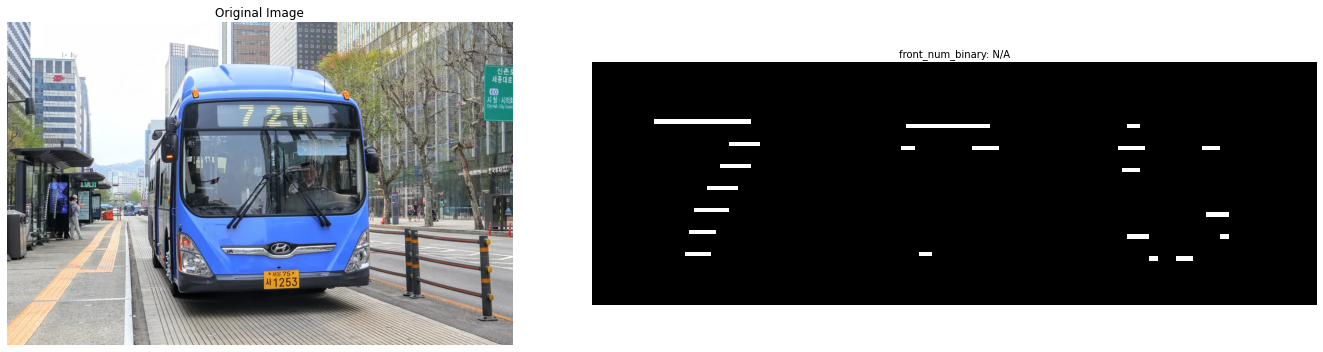

{'front_num_binary': 'N/A'}

In [4]:
import cv2
import easyocr
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# **1️⃣ YOLO 모델 로드**
model_path = "/data/BUS/trained_model.pt"  # YOLO 모델 파일 경로
model = YOLO(model_path)

# **2️⃣ 이미지 로드**
image_path = "/data/BUS/image_4.png"  # 업로드된 이미지 사용
image = cv2.imread(image_path)

# **3️⃣ YOLO를 사용하여 객체 탐지**
results = model(image)

# EasyOCR 리더 생성
reader = easyocr.Reader(["ko", "en"])

# **4️⃣ front_num, back_num, side_num 영역 크롭**
cropped_images = {}
expand_ratio = 0.1  # 🔹 바운딩 박스를 확장할 비율 (10%)

target_classes = {"front_num", "back_num", "side_num"}  # ✅ bus 제외

for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # 검출된 박스 좌표
        label = r.names[int(box.cls[0])]  # 객체 이름

        if label in target_classes:  # ✅ 'bus' 제외하고 3개 클래스만 처리
            # 🔹 바운딩 박스 확장
            width, height = x2 - x1, y2 - y1
            x1 = max(0, x1 - int(width * expand_ratio))
            y1 = max(0, y1 - int(height * expand_ratio))
            x2 = min(image.shape[1], x2 + int(width * expand_ratio))
            y2 = min(image.shape[0], y2 + int(height * expand_ratio))

            cropped_img = image[y1:y2, x1:x2]
            cropped_images[label] = cropped_img  # 라벨별 이미지 저장

# **5️⃣ front_num만 OCR 처리, back_num과 side_num은 원본 그대로 출력**
ocr_results = {}
processed_images = {}

for label, cropped_img in cropped_images.items():
    if label == "front_num":  # ✅ front_num만 OCR 처리
        # 🔹 그레이스케일 변환
        gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

        # 🔹 흰색(LED 숫자) 검출
        lower_white = 200  # 밝은 영역 기준
        upper_white = 255
        _, binary = cv2.threshold(gray, lower_white, upper_white, cv2.THRESH_BINARY)

        # 🔹 숫자 강조: MORPH_CLOSE (끊긴 부분 연결)
        kernel = np.ones((2, 2), np.uint8)
        binary = cv2.morphologyEx(binary, cv2.MORPH_RECT, kernel, iterations=2)

        # 🔹 바이너리 이미지 저장
        processed_images[f"{label}_binary"] = binary

        # 🔹 OCR 실행
        ocr_result = reader.readtext(binary, detail=0)  # EasyOCR 실행
        extracted_text = " ".join(ocr_result) if ocr_result else "N/A"
        ocr_results[f"{label}_binary"] = extracted_text
    else:
        # 🔹 back_num과 side_num은 OCR 처리 없이 원본 저장
        processed_images[label] = cropped_img
        ocr_results[label] = "OCR 미적용"  # OCR 결과 없음

# **6️⃣ 결과 시각화**
num_images = len(processed_images) + 1  # 원본 이미지 포함
fig, axs = plt.subplots(1, num_images, figsize=(20, 5))

# 🔹 `axs`가 단일 객체인지 확인 후 처리
if num_images == 1:
    axs.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs.set_title("Original Image")
    axs.axis("off")
else:
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[0].set_title("Original Image")
    axs[0].axis("off")

    for idx, (label, processed_img) in enumerate(processed_images.items()):
        cmap_option = "gray" if "binary" in label else None  # OCR 적용 시 그레이스케일 표시
        axs[idx + 1].imshow(processed_img, cmap=cmap_option)
        axs[idx + 1].set_title(f"{label}: {ocr_results[label]}", fontsize=10)
        axs[idx + 1].axis("off")

plt.tight_layout()
plt.show()

# **7️⃣ 최종 OCR 결과 출력**
ocr_results


------


0: 352x640 1 bus, 1 front_num, 2 side_nums, 5.5ms
Speed: 1.3ms preprocess, 5.5ms inference, 1.1ms postprocess per image at shape (1, 3, 352, 640)


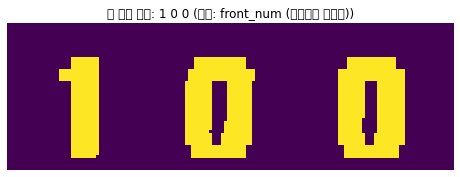

🎯 최종 버스 번호: 1 0 0 (출처: front_num (이진화된 이미지))


In [ ]:
import cv2
import easyocr
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import re  # 숫자 검출을 위한 정규 표현식 사용

# **1️⃣ YOLO 모델 로드**
model_path = "/data/BUS/trained_model.pt"  # YOLO 모델 파일 경로
model = YOLO(model_path)

# **2️⃣ 이미지 로드**
image_path = "/data/BUS/image_3.png"  # 업로드된 이미지 사용
image = cv2.imread(image_path)

# **3️⃣ YOLO를 사용하여 객체 탐지**
results = model(image)

# EasyOCR 리더 생성
reader = easyocr.Reader(["ko", "en"])

# **4️⃣ 모든 번호판 영역 크롭 (front_num, back_num, side_num)**
cropped_images = {}
expand_ratio = 0.1  # 🔹 바운딩 박스를 확장할 비율 (10%)

target_classes = {"front_num", "back_num", "side_num"}  # ✅ bus 제외

for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # 검출된 박스 좌표
        label = r.names[int(box.cls[0])]  # 객체 이름

        if label in target_classes:  # ✅ 번호판 3개만 처리
            # 🔹 바운딩 박스 확장
            width, height = x2 - x1, y2 - y1
            x1 = max(0, x1 - int(width * expand_ratio))
            y1 = max(0, y1 - int(height * expand_ratio))
            x2 = min(image.shape[1], x2 + int(width * expand_ratio))
            y2 = min(image.shape[0], y2 + int(height * expand_ratio))

            cropped_img = image[y1:y2, x1:x2]
            cropped_images[label] = cropped_img  # 라벨별 이미지 저장

# **5️⃣ OCR 적용 (최초로 숫자가 감지된 값을 버스 번호로 확정)**
bus_number = "N/A (모든 번호 인식 실패)"
bus_number_source = None  # 어디서 인식했는지 저장
ocr_results = {}
processed_images = {}

for label, cropped_img in cropped_images.items():
    # 🔹 1차 OCR을 위한 이미지 전처리 (이진화)
    gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

    # 🔹 밝은 숫자 강조 (THRESH_BINARY)
    lower_white = 200
    upper_white = 255
    _, binary = cv2.threshold(gray, lower_white, upper_white, cv2.THRESH_BINARY)

    # 🔹 MORPH_CLOSE 적용 (숫자 강조)
    kernel = np.ones((2, 2), np.uint8)
    binary = cv2.morphologyEx(binary, cv2.MORPH_RECT, kernel, iterations=3)

    # 🔹 1차 OCR 실행 (이진화된 이미지)
    ocr_result = reader.readtext(binary, detail=0)
    extracted_text = " ".join(ocr_result) if ocr_result else "N/A"

    # 🔹 OCR 결과가 숫자를 포함하는지 확인
    if re.search(r"\d", extracted_text):  # 숫자가 하나라도 포함된 경우
        bus_number = extracted_text  # 버스 번호 확정
        bus_number_source = f"{label} (이진화된 이미지)"
        processed_images = {label: binary}  # 해당 이미지만 출력
        break  # 첫 번째로 감지된 숫자로 확정 후 반복 종료

    # 🔹 OCR 결과가 "N/A"이면 원본 크롭 이미지에서 다시 OCR 실행
    if extracted_text == "N/A":
        print(f"⚠️ {label}: 1차 OCR 실패, 원본 이미지에서 재시도...")
        ocr_result_original = reader.readtext(cropped_img, detail=0)
        extracted_text = " ".join(ocr_result_original) if ocr_result_original else "N/A"

        # 🔹 OCR 결과가 숫자를 포함하는지 확인
        if re.search(r"\d", extracted_text):  # 숫자가 하나라도 포함된 경우
            bus_number = extracted_text  # 버스 번호 확정
            bus_number_source = f"{label} (원본 이미지)"
            processed_images = {label: cropped_img}  # 해당 이미지만 출력
            break  # 첫 번째로 감지된 숫자로 확정 후 반복 종료

# **6️⃣ 결과 시각화 (버스 번호가 감지된 이미지만 출력)**
fig, ax = plt.subplots(figsize=(8, 5))

if processed_images:
    label, processed_img = list(processed_images.items())[0]
    cmap_option = "gray" if "binary" in label else None  # OCR 적용된 이미지는 흑백으로 표시
    ax.imshow(processed_img, cmap=cmap_option)
    ax.set_title(f"🚍 버스 번호: {bus_number} (출처: {bus_number_source})", fontsize=12)
    ax.axis("off")
else:
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.set_title("🚍 버스 번호 인식 실패", fontsize=12)
    ax.axis("off")

plt.show()

# **7️⃣ 최종 OCR 결과 출력**
print(f"🎯 최종 버스 번호: {bus_number} (출처: {bus_number_source})")


-----


0: 640x544 1 bus, 2 front_nums, 7.2ms
Speed: 1.7ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)
⚠️ front_num: 1차 OCR 실패, iterations=1 → 재시도 (iterations=2)...
⚠️ front_num: 1차 OCR 실패, iterations=1 → 재시도 (iterations=3)...
⚠️ front_num: 1차 OCR 실패, iterations=1 → 재시도 (iterations=4)...


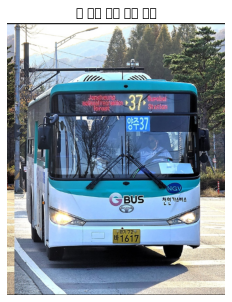

🎯 최종 버스 번호: N/A (모든 번호 인식 실패) (출처: None)


In [373]:
import cv2
import easyocr
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import re  # 숫자 검출을 위한 정규 표현식 사용

# **1️⃣ YOLO 모델 로드**
model_path = "/data/BUS/trained_model.pt"  # YOLO 모델 파일 경로
model = YOLO(model_path)

# **2️⃣ 이미지 로드**
image_path = "/data/BUS/image_2.png"  # 업로드된 이미지 사용
image = cv2.imread(image_path)

# **3️⃣ YOLO를 사용하여 객체 탐지**
results = model(image)

# EasyOCR 리더 생성
reader = easyocr.Reader(["ko", "en"])

# **4️⃣ 모든 번호판 영역 크롭 (front_num, back_num, side_num)**
cropped_images = {}
expand_ratio = 0.1  # 🔹 바운딩 박스를 확장할 비율 (10%)

target_classes = {"front_num", "back_num", "side_num"}  # ✅ bus 제외

for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # 검출된 박스 좌표
        label = r.names[int(box.cls[0])]  # 객체 이름

        if label in target_classes:  # ✅ 번호판 3개만 처리
            # 🔹 바운딩 박스 확장
            width, height = x2 - x1, y2 - y1
            x1 = max(0, x1 - int(width * expand_ratio))
            y1 = max(0, y1 - int(height * expand_ratio))
            x2 = min(image.shape[1], x2 + int(width * expand_ratio))
            y2 = min(image.shape[0], y2 + int(height * expand_ratio))

            cropped_img = image[y1:y2, x1:x2]
            cropped_images[label] = cropped_img  # 라벨별 이미지 저장

# **5️⃣ OCR 적용 (iterations 값 자동 조정)**
bus_number = "N/A (모든 번호 인식 실패)"
bus_number_source = None  # 어디서 인식했는지 저장
ocr_results = {}
processed_images = {}

for label, cropped_img in cropped_images.items():
    # 🔹 1차 OCR을 위한 이미지 전처리 (이진화)
    gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

    # 🔹 밝은 숫자 강조 (THRESH_BINARY)
    lower_white = 200
    upper_white = 255
    _, binary = cv2.threshold(gray, lower_white, upper_white, cv2.THRESH_BINARY)

    # 🔹 바운딩 박스 크기에 따라 `iterations` 값 자동 조절
    bbox_width = cropped_img.shape[1]  # 바운딩 박스의 가로 길이
    iterations = max(1, min(4, bbox_width // 50))  # 최소 1, 최대 4까지 자동 조절

    # 🔹 MORPH_CLOSE 적용 (CROSS 커널)
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (2, 2))
    binary = cv2.morphologyEx(binary, cv2.MORPH_CROSS, kernel, iterations=iterations) # L

    # 🔹 1차 OCR 실행 (이진화된 이미지)
    ocr_result = reader.readtext(binary, detail=0)
    extracted_text = " ".join(ocr_result) if ocr_result else "N/A"

    # 🔹 OCR 결과가 숫자를 포함하는지 확인
    if re.search(r"\d", extracted_text):  # 숫자가 하나라도 포함된 경우
        bus_number = extracted_text  # 버스 번호 확정
        bus_number_source = f"{label} (이진화된 이미지, iterations={iterations})"
        processed_images = {label: binary}  # 해당 이미지만 출력
        break  # 첫 번째로 감지된 숫자로 확정 후 반복 종료

    # 🔹 OCR 결과가 "N/A"이면 `iterations`을 증가시키면서 재시도
    for i in range(1, 4):  # 🔹 1 → 2 → 3 → 4로 증가
        print(f"⚠️ {label}: 1차 OCR 실패, iterations={iterations} → 재시도 (iterations={i+1})...")
        binary = cv2.morphologyEx(binary, cv2.MORPH_CROSS, kernel, iterations=i+1) # L

        ocr_result_original = reader.readtext(binary, detail=0)
        extracted_text = " ".join(ocr_result_original) if ocr_result_original else "N/A"

        if re.search(r"\d", extracted_text):  # 숫자가 포함되면 종료
            bus_number = extracted_text
            bus_number_source = f"{label} (이진화된 이미지, iterations={i+1})"
            processed_images = {label: binary}
            break

# **6️⃣ 결과 시각화 (버스 번호가 감지된 이미지만 출력)**
fig, ax = plt.subplots(figsize=(8, 5))

if processed_images:
    label, processed_img = list(processed_images.items())[0]
    cmap_option = "gray" if processed_img.ndim == 2 else None  # OCR 적용된 이미지는 흑백으로 표시
    ax.imshow(processed_img, cmap=cmap_option)
    ax.set_title(f"🚍 버스 번호: {bus_number} (출처: {bus_number_source})", fontsize=12)
    ax.axis("off")
else:
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.set_title("🚍 버스 번호 인식 실패", fontsize=12)
    ax.axis("off")

plt.show()

# **7️⃣ 최종 OCR 결과 출력**
print(f"🎯 최종 버스 번호: {bus_number} (출처: {bus_number_source})")



0: 352x640 1 bus, 1 front_num, 2 side_nums, 5.4ms
Speed: 1.3ms preprocess, 5.4ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)
⚠️ front_num: OCR 실패 → kernel_size=3, iterations=2 재시도...
⚠️ side_num: OCR 실패 → kernel_size=2, iterations=2 재시도...
⚠️ side_num: OCR 실패 → kernel_size=3, iterations=3 재시도...
⚠️ side_num: OCR 실패 → kernel_size=4, iterations=4 재시도...


/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


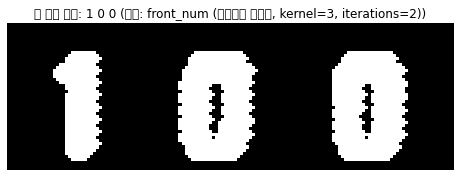

🎯 최종 버스 번호: 1 0 0 (출처: front_num (이진화된 이미지, kernel=3, iterations=2))


In [29]:
import cv2
import easyocr
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import re  # 숫자 검출을 위한 정규 표현식 사용

# **1️⃣ YOLO 모델 로드**
model_path = "/data/BUS/trained_model.pt"  # YOLO 모델 파일 경로
model = YOLO(model_path)

# **2️⃣ 이미지 로드**
image_path = "/data/BUS/image_3.png"  # 업로드된 이미지 사용
image = cv2.imread(image_path)

# **3️⃣ YOLO를 사용하여 객체 탐지**
results = model(image)

# EasyOCR 리더 생성
reader = easyocr.Reader(["ko", "en"])

# **4️⃣ 모든 번호판 영역 크롭 (front_num, back_num, side_num)**
cropped_images = {}
expand_ratio = 0.1  # 🔹 바운딩 박스를 확장할 비율 (10%)

target_classes = {"front_num", "back_num", "side_num"}  # ✅ bus 제외

for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # 검출된 박스 좌표
        label = r.names[int(box.cls[0])]  # 객체 이름

        if label in target_classes:  # ✅ 번호판 3개만 처리
            # 🔹 바운딩 박스 확장
            width, height = x2 - x1, y2 - y1
            x1 = max(0, x1 - int(width * expand_ratio))
            y1 = max(0, y1 - int(height * expand_ratio))
            x2 = min(image.shape[1], x2 + int(width * expand_ratio))
            y2 = min(image.shape[0], y2 + int(height * expand_ratio))

            cropped_img = image[y1:y2, x1:x2]
            cropped_images[label] = cropped_img  # 라벨별 이미지 저장

# **5️⃣ OCR 적용 (iterations 값 및 kernel_size 자동 조정)**
bus_number = "N/A (모든 번호 인식 실패)"
bus_number_source = None  # 어디서 인식했는지 저장
ocr_results = {}
processed_images = {}

adaptive_kernel = True  # ✅ True: 자동, False: 수동 설정

for label, cropped_img in cropped_images.items():
    # 🔹 1차 OCR을 위한 이미지 전처리 (이진화)
    gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

    # 🔹 밝은 숫자 강조 (THRESH_BINARY)
    lower_white = 200
    upper_white = 255
    _, binary = cv2.threshold(gray, lower_white, upper_white, cv2.THRESH_BINARY)

    # 🔹 바운딩 박스 크기에 따라 `iterations` 및 `kernel_size` 값 자동 조절
    bbox_width = cropped_img.shape[1]  # 바운딩 박스의 가로 길이
    iterations = max(1, min(3, bbox_width // 50))  # 최소 1, 최대 4까지 자동 조절

    if adaptive_kernel:
        kernel_size = max(1, min(3, bbox_width // 50))  # ✅ 바운딩 박스 크기에 따라 자동 조정 (최소 2, 최대 5)
    else:
        kernel_size = 2  # ✅ 사용자가 직접 지정 가능

    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (kernel_size, kernel_size))
    binary = cv2.morphologyEx(binary, cv2.MORPH_CROSS, kernel, iterations=iterations)

    # 🔹 1차 OCR 실행 (이진화된 이미지)
    ocr_result = reader.readtext(binary, detail=0)
    extracted_text = " ".join(ocr_result) if ocr_result else "N/A"

    # 🔹 OCR 결과가 숫자를 포함하는지 확인
    if re.search(r"\d", extracted_text):  # 숫자가 하나라도 포함된 경우
        bus_number = extracted_text  # 버스 번호 확정
        bus_number_source = f"{label} (이진화된 이미지, kernel={kernel_size}, iterations={iterations})"
        processed_images = {label: binary}  # 해당 이미지만 출력
        break  # 첫 번째로 감지된 숫자로 확정 후 반복 종료

    # 🔹 OCR 결과가 "N/A"이면 `kernel_size` 및 `iterations`을 증가시키면서 재시도
    for i in range(1, 4):  # 🔹 1 → 2 → 3 → 4로 증가
        kernel_size = min(5, kernel_size + 1)  # ✅ 실패할 때마다 커널 크기 증가 (최대 5)
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (kernel_size, kernel_size))
        binary = cv2.morphologyEx(binary, cv2.MORPH_CROSS, kernel, iterations=i+1)

        print(f"⚠️ {label}: OCR 실패 → kernel_size={kernel_size}, iterations={i+1} 재시도...")

        ocr_result_original = reader.readtext(binary, detail=0)
        extracted_text = " ".join(ocr_result_original) if ocr_result_original else "N/A"

        if re.search(r"\d", extracted_text):  # 숫자가 포함되면 종료
            bus_number = extracted_text
            bus_number_source = f"{label} (이진화된 이미지, kernel={kernel_size}, iterations={i+1})"
            processed_images = {label: binary}
            break

# **6️⃣ 결과 시각화 (버스 번호가 감지된 이미지만 출력)**
fig, ax = plt.subplots(figsize=(8, 5))

if processed_images:
    label, processed_img = list(processed_images.items())[0]
    cmap_option = "gray" if processed_img.ndim == 2 else None  # OCR 적용된 이미지는 흑백으로 표시
    ax.imshow(processed_img, cmap=cmap_option)
    ax.set_title(f"🚍 버스 번호: {bus_number} (출처: {bus_number_source})", fontsize=12)
    ax.axis("off")
else:
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.set_title("🚍 버스 번호 인식 실패", fontsize=12)
    ax.axis("off")

plt.show()

# **7️⃣ 최종 OCR 결과 출력**
print(f"🎯 최종 버스 번호: {bus_number} (출처: {bus_number_source})")



0: 640x544 1 bus, 2 front_nums, 7.1ms
Speed: 2.3ms preprocess, 7.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)


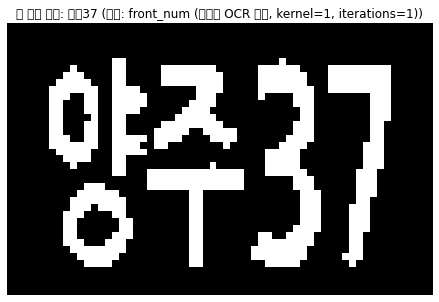

🎯 최종 버스 번호: 양주37 (출처: front_num (전처리 OCR 성공, kernel=1, iterations=1))


In [50]:
import cv2
import easyocr
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import re  # 정규 표현식 사용

# **1️⃣ YOLO 모델 로드**
model_path = "/data/BUS/trained_model.pt"  # YOLO 모델 파일 경로
model = YOLO(model_path)

# **2️⃣ 이미지 로드**
image_path = "/data/BUS/image_2.png"  # 업로드된 이미지 사용
image = cv2.imread(image_path)

# **3️⃣ EasyOCR 리더 생성**
reader = easyocr.Reader(["ko", "en"])  # ✅ 한국어 + 영어 OCR 지원

# **4️⃣ YOLO를 사용해 ROI(번호판) 검출**
cropped_images = {}
expand_ratio = 0.1  # 🔹 바운딩 박스를 확장할 비율 (10%)
target_classes = {"front_num", "back_num", "side_num"}  # ✅ bus 제외

for r in model(image):
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # 검출된 박스 좌표
        label = model.names[int(box.cls[0])]  # 객체 이름

        if label in target_classes:  # ✅ 번호판 3개만 처리
            # 🔹 바운딩 박스 확장
            width, height = x2 - x1, y2 - y1
            x1 = max(0, x1 - int(width * expand_ratio))
            y1 = max(0, y1 - int(height * expand_ratio))
            x2 = min(image.shape[1], x2 + int(width * expand_ratio))
            y2 = min(image.shape[0], y2 + int(height * expand_ratio))

            cropped_img = image[y1:y2, x1:x2]
            cropped_images[label] = cropped_img  # 라벨별 이미지 저장

# **5️⃣ OCR 적용 (전처리 후 OCR)**
bus_number = "N/A (모든 번호 인식 실패)"
bus_number_source = None  # 어디서 인식했는지 저장
processed_images = {}

for label, cropped_img in cropped_images.items():
    gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

    # 🔹 `kernel_size` (2~5)와 `iterations` (1~4)를 조합하여 OCR 시도
    for kernel_size in range(1, 5):  # 2, 3, 4, 5
        for iterations in range(1, 5):  # 1, 2, 3, 4
            kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (kernel_size, kernel_size))
            binary = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)[1]
            binary = cv2.morphologyEx(binary, cv2.MORPH_CROSS, kernel, iterations=iterations)

            # 🔹 OCR 실행
            ocr_result = reader.readtext(binary, detail=0)
            extracted_text = " ".join(ocr_result) if ocr_result else "N/A"

            if extracted_text and extracted_text != "N/A":
                bus_number = extracted_text
                bus_number_source = f"{label} (전처리 OCR 성공, kernel={kernel_size}, iterations={iterations})"
                processed_images = {label: binary}
                break  # ✅ OCR 성공하면 즉시 종료

        if bus_number != "N/A (모든 번호 인식 실패)":
            break  # ✅ OCR 성공하면 내부 루프도 종료

# **6️⃣ 전처리 OCR 실패 시, 원본 ROI에서 OCR 실행**
if bus_number == "N/A (모든 번호 인식 실패)":
    for label, cropped_img in cropped_images.items():
        ocr_result = reader.readtext(cropped_img, detail=0)
        extracted_text = " ".join(ocr_result) if ocr_result else "N/A"

        if extracted_text and extracted_text != "N/A":
            bus_number = extracted_text
            bus_number_source = f"{label} (원본 ROI OCR 성공)"
            processed_images = {label: cropped_img}
            break  # ✅ OCR 성공하면 즉시 종료

# **7️⃣ 원본 ROI에서도 OCR 실패 시, 전체 이미지에서 OCR 실행**
if bus_number == "N/A (모든 번호 인식 실패)":
    ocr_result = reader.readtext(image, detail=0)
    extracted_text = " ".join(ocr_result) if ocr_result else "N/A"

    if extracted_text and extracted_text != "N/A":
        bus_number = extracted_text
        bus_number_source = "전체 이미지 OCR 성공"
        processed_images = {"original": image}

# **8️⃣ 결과 시각화**
fig, ax = plt.subplots(figsize=(8, 5))

if processed_images:
    label, processed_img = list(processed_images.items())[0]
    cmap_option = "gray" if processed_img.ndim == 2 else None  # OCR 적용된 이미지는 흑백으로 표시
    ax.imshow(cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB) if cmap_option is None else processed_img, cmap=cmap_option)
    ax.set_title(f"🚍 버스 번호: {bus_number} (출처: {bus_number_source})", fontsize=12)
    ax.axis("off")
else:
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.set_title("🚍 버스 번호 인식 실패", fontsize=12)
    ax.axis("off")

plt.show()

# **9️⃣ 최종 OCR 결과 출력**
print(f"🎯 최종 버스 번호: {bus_number} (출처: {bus_number_source})")



0: 416x640 1 bus, 1 front_num, 6.1ms
Speed: 2.1ms preprocess, 6.1ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)


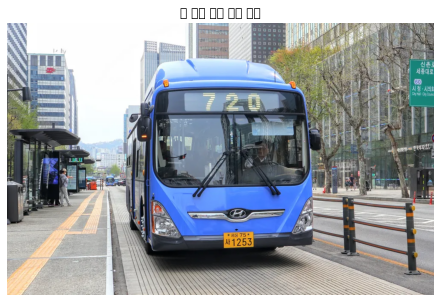

🎯 최종 버스 번호: N/A (모든 번호 인식 실패) (출처: None)


In [58]:
import cv2
import easyocr
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import re  # 정규 표현식 사용

# **1️⃣ YOLO 모델 로드**
model_path = "/data/BUS/trained_model.pt"  # YOLO 모델 파일 경로
model = YOLO(model_path)

# **2️⃣ 이미지 로드**
image_path = "/data/BUS/image_4.png"  # 업로드된 이미지 사용
image = cv2.imread(image_path)

# **3️⃣ EasyOCR 리더 생성**
reader = easyocr.Reader(["ko", "en"])  # ✅ 한국어 + 영어 OCR 지원

# **4️⃣ YOLO를 사용해 ROI(번호판) 검출**
cropped_images = {}
expand_ratio = 0.1  # 🔹 바운딩 박스를 확장할 비율 (10%)
target_classes = {"front_num", "back_num", "side_num"}  # ✅ bus 제외

for r in model(image):
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # 검출된 박스 좌표
        label = model.names[int(box.cls[0])]  # 객체 이름

        if label in target_classes:  # ✅ 번호판 3개만 처리
            # 🔹 바운딩 박스 확장
            width, height = x2 - x1, y2 - y1
            x1 = max(0, x1 - int(width * expand_ratio))
            y1 = max(0, y1 - int(height * expand_ratio))
            x2 = min(image.shape[1], x2 + int(width * expand_ratio))
            y2 = min(image.shape[0], y2 + int(height * expand_ratio))

            cropped_img = image[y1:y2, x1:x2]
            cropped_images[label] = cropped_img  # 라벨별 이미지 저장

# **🔹 버스 번호 필터링 함수**
def extract_bus_number(texts):
    """OCR 결과에서 '문자 + 띄어쓰기 + 숫자' 패턴을 우선 선택"""
    bus_number_candidates = []
    
    for text in texts:
        # ✅ "문자 + 띄어쓰기 + 숫자" 패턴 찾기
        match = re.search(r"[가-힣A-Za-z]+\s?\d+(-\d+)?", text)
        if match:
            bus_number_candidates.append(match.group())  # 올바른 형식 저장

    if bus_number_candidates:
        return bus_number_candidates[0]  # 첫 번째 일치하는 값 반환
    
    # 🔹 "숫자만 있는 경우" 예외 처리
    num_only_match = re.findall(r"\d+(-\d+)?", " ".join(texts))
    return num_only_match[0] if num_only_match else "N/A"

# **5️⃣ OCR 적용 (전처리 후 OCR)**
bus_number = "N/A (모든 번호 인식 실패)"
bus_number_source = None  # 어디서 인식했는지 저장
processed_images = {}

for label, cropped_img in cropped_images.items():
    gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

    # 🔹 `kernel_size` (2~5)와 `iterations` (1~4)를 조합하여 OCR 시도
    for kernel_size in range(2, 6):  # 2, 3, 4, 5
        for iterations in range(1, 5):  # 1, 2, 3, 4
            kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (kernel_size, kernel_size))
            binary = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)[1]
            binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=iterations)

            # 🔹 OCR 실행
            ocr_result = reader.readtext(binary, detail=0)
            extracted_text = extract_bus_number(ocr_result)

            if extracted_text and extracted_text != "N/A":
                bus_number = extracted_text
                bus_number_source = f"{label} (전처리 OCR 성공, kernel={kernel_size}, iterations={iterations})"
                processed_images = {label: binary}
                break  # ✅ OCR 성공하면 즉시 종료

        if bus_number != "N/A (모든 번호 인식 실패)":
            break  # ✅ OCR 성공하면 내부 루프도 종료

# **6️⃣ 전처리 OCR 실패 시, 원본 ROI에서 OCR 실행**
if bus_number == "N/A (모든 번호 인식 실패)":
    for label, cropped_img in cropped_images.items():
        ocr_result = reader.readtext(cropped_img, detail=0)
        extracted_text = extract_bus_number(ocr_result)

        if extracted_text and extracted_text != "N/A":
            bus_number = extracted_text
            bus_number_source = f"{label} (원본 ROI OCR 성공)"
            processed_images = {label: cropped_img}
            break  # ✅ OCR 성공하면 즉시 종료

# **7️⃣ OCR 결과 시각화**
fig, ax = plt.subplots(figsize=(8, 5))

if processed_images:
    label, processed_img = list(processed_images.items())[0]
    cmap_option = "gray" if processed_img.ndim == 2 else None  # OCR 적용된 이미지는 흑백으로 표시
    ax.imshow(cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB) if cmap_option is None else processed_img, cmap=cmap_option)
    ax.set_title(f"🚍 버스 번호: {bus_number} (출처: {bus_number_source})", fontsize=12)
    ax.axis("off")
else:
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.set_title("🚍 버스 번호 인식 실패", fontsize=12)
    ax.axis("off")

plt.show()

# **8️⃣ 최종 OCR 결과 출력**
print(f"🎯 최종 버스 번호: {bus_number} (출처: {bus_number_source})")
